In this example, we will show how to create a very simple tissue structure comprised of cubic cells and visualize it using Multicell.

# Preparation

Visualizations rely on the matplotlib module. In order for visualizations to work interactively in this Jupyter notebook, we need to run the following command.

In [1]:
%matplotlib notebook

# Imports
In Python, it is common practice to import the modules we will be using at the beginning of the script. To create a simple virtual tissue, we will need the Multicell module.

In [2]:
import multicell

We then need to define the problem

# Problem definition

## Tissue structure

The simulation_builder module can be used to create a virtual tissue, e.g. in this case a cubic cell grid.

As the grid is regular, aside from a small amount of random noise used to break symmetry, all cells have identical sizes measured in arbitrary units, with sides 1 arb. unit-long. The neighbors of a cell are cells that are in direct contact. In this simple case, as we have a single layer of identical and aligned cells, each cell will have between two and four neighbors, depending on its position in the grid. The contact surface of any two adjacent cells will always be equal to $1 (arb. unit)^2$. All cells also have a volume of $1 (arb. unit)^3$ (Fig. 1).

<img src="img/fig1.png" />
<center>Figure 1: Structure of a grid tissue comprised of cubic cells. (a) Each cell is a cube whose sides are 1 arb. unit long. (b) Depending on its position within the tissue, the red cell can have 2, 3 or 4 neighbors (in green).</center>

As grid tissues are convenient to quickly build prototype models, multicell provides a function, `generate_cell_grid_sim` that automatically prepares simulations based on grid tissues.

In [3]:
sim = multicell.generate_cell_grid_sim(x=20,y=20, z=1, noise_amplitude=1e-3)

The usage of this function (and others) can be checked out in its documentation.

In [4]:
help(multicell.generate_cell_grid_sim)

Help on function generate_cell_grid_sim in module multicell.simulation_builder:

generate_cell_grid_sim(x, y=0, z=0, noise_amplitude=0.001, sim_class=<class 'multicell.simulation.Simulation'>)
    Builds a Simulation object with a grid-shaped tissue.
    
    Parameters
    ----------
        x : int
            Number of cells along the x axis
        y : int
            Number of cells along the y axis, not used if 0 (default: 0)
        z : int
            Number of cells along the z axis, not used if 0 (default: 0)
        noise_amplitude : double
            Amplitude of the random noise applied to the position of vertices.
            The perturbations applied to each vertex are independent and
            follow a uniform distribution between -noise_amplitude/2. and
            noise_amplitude/2. (default: 1e-3)
    
    Returns
    -------
        Simulation
            Simulation object containing the grid.



Behind the scenes, this function performs several operations. Knowing what they are is not necessary for the series of examples presented in this chapter, but would be useful, should Multicell be used to run simulations in custom tissue structures. First a simulation object is created.

In [5]:
sim = multicell.Simulation()

Then a grid tissue is created using a function provided by Virtual Plants. It contains topological information (information about which vertices are connected by edges, which edges form faces and which faces form cells). This is stored in the `mesh` variable. It also contains information about the positions of all vertices. This is stored in the `pos` variable.

In [6]:
from openalea.tissueshape import tovec, grid_tissue
tissuedb = grid_tissue.regular_grid((20, 20, 1))
mesh = tissuedb.get_topology("mesh_id")
pos = tovec(tissuedb.get_property("position"))

Vertex positions are then modified. The tissue is centered in space (this is not necessary) and a small noise is applied (this is important when symmetry needs to be broken, e.g. in the division algorithm we will use in a later example).

In [7]:
import numpy as np
bary = reduce(lambda x,y: x + y,pos.itervalues() ) / len(pos)
pos = dict((pid,vec - bary + np.random.uniform(-5e-4, 5e-4, 3)) for pid,vec in pos.iteritems())

Finally, `mesh` and `pos` are imported into the simulation.

In [8]:
sim.import_topomesh(mesh, pos)

In this example, `mesh` and `pos` correspond to a regular grid, but they could represent any tissue structure, as long as it is defined in the correct format (OpenAlea TopoMesh).

## Visualization

To display the tissue we just created, we register a renderer. A renderer is an object with a `display()` method, whose purpose is to display a graphical representation of the simulation. A renderer is registered by passing the class of the renderer to the `register_renderer` method of our simulation object. The additional arguments are the name of the variable to plot on the tissue (if any), and a dictionary of arguments for the renderer class. Here, we supply (optional) arguments to `MatplotlibRenderer`: `view` defines the default angle of the 3D visualization (a top view in this case), and `axes` determines whether axes should be visible or not.

<IPython.core.display.Javascript object>


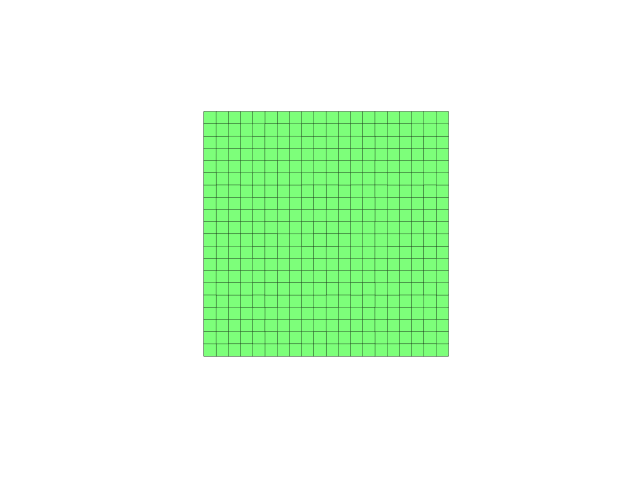

Time point: 0.0


In [9]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, None, {"view": (90, -90), "axes":False})
sim.renderer.display()

This single-layer cell grid will be our starting point for all the examples of this chapter.
Other types of virtual tissues could be created (e.g.: irregular grids, 3D grids with non planar geometries...) and imported into a simulation object. They simply need to be defined as an OpenAlea Topomesh object.